In [2]:
# %init
import json, glob, sys, os, gzip, time
from IPython.display import HTML
import ipywidgets
import numpy as np ; np.set_printoptions(linewidth=150)
import pandas as pd
import matplotlib.pyplot as plt
from yahist import set_default_style, Hist1D, Hist2D
from tqdm.auto import tqdm
import requests
import pdroot

        

In [38]:
dfc = pd.read_csv("GradeLevelData_V3.csv", index_col=0)
dfc.columns = dfc.columns.str.lower()
dfc = dfc[["day","weekday","district","county","gradelevel","mem","abs","absentpercent"]]
dfc["date"] = pd.to_datetime(dfc["day"])
dfc = dfc.set_index("date")
dfc = dfc.dropna()
print(dfc.memory_usage(deep=True).sum()*1e-6)
dfc

28.60136


,day,weekday,district,county,gradelevel,mem,abs,absentpercent
date,,,,,,,,
2020-08-18,2020-08-18,Tuesday,PASADENA ISD,Harris,EE,123.0,0.0,0.0
2020-08-19,2020-08-19,Wednesday,PASADENA ISD,Harris,EE,124.0,2.0,1.6
2020-08-20,2020-08-20,Thursday,PASADENA ISD,Harris,EE,127.0,7.0,5.5
2020-08-21,2020-08-21,Friday,PASADENA ISD,Harris,EE,129.0,5.0,3.9
2020-08-24,2020-08-24,Monday,PASADENA ISD,Harris,EE,129.0,4.0,3.1
...,...,...,...,...,...,...,...,...
2020-11-04,2020-11-04,Wednesday,FORT WORTH ISD,Tarrant,K,1.0,0.0,0.0
2020-11-05,2020-11-05,Thursday,FORT WORTH ISD,Tarrant,K,1.0,0.0,0.0
2020-11-05,2020-11-05,Thursday,FORT WORTH ISD,Tarrant,K,1.0,0.0,0.0


In [87]:
dfc.index.min(), dfc.index.max()

(Timestamp('2020-08-12 00:00:00'), Timestamp('2020-11-13 00:00:00'))

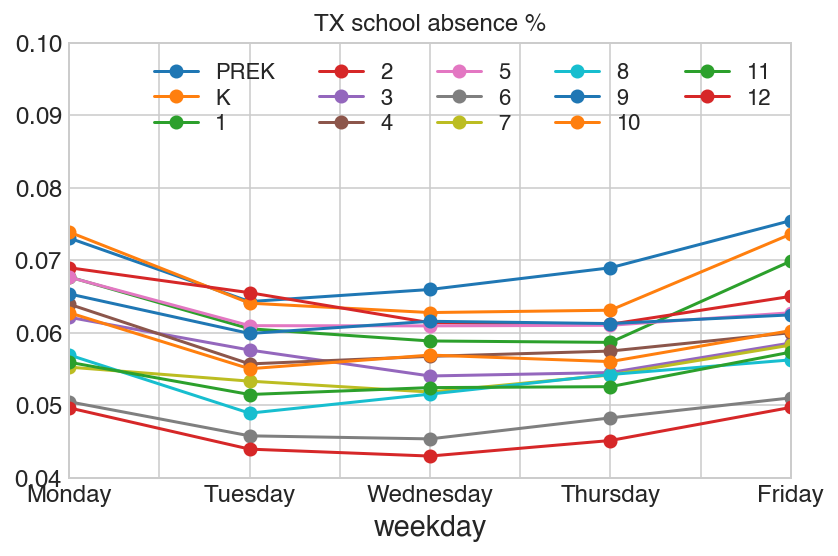

In [85]:
style = "seaborn-whitegrid"
with plt.style.context(style):
    fig, ax = plt.subplots()
    for level in dfc["gradelevel"].unique():
        if level in ["EE"]: continue
        s = dfc.query(f"gradelevel=='{level}'").groupby("weekday")[["mem","abs"]].sum().assign(frac=lambda x:x["abs"]/x["mem"])["frac"]
        s = s[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]]
        s.plot(ax=ax, marker="o", label=level)
    ax.set_ylim([0.04,0.1])
    ax.legend(ncol=5)
    ax.set_title("TX school absence %")

weekday
Monday       0.049620
Tuesday      0.043927
Wednesday    0.042972
Thursday     0.045117
Friday       0.049680
Name: frac, dtype: float64

In [49]:
# fig, ax = plt.subplots()
# dfc.groupby("gradelevel")[["mem","abs"]].sum().assign(frac=lambda x:x["abs"]/x["mem"])["frac"].plot(ax=ax, marker="o")
# ax.set_ylim([0.,0.1])
dfc.groupby("gradelevel")[["mem","abs"]].sum().assign(frac=lambda x:x["abs"]/x["mem"])["frac"].sort_values()

gradelevel
12      0.046128
6       0.048078
8       0.053483
11      0.053852
7       0.054504
3       0.057143
10      0.058041
4       0.058595
9       0.062009
5       0.062493
1       0.062886
2       0.064180
K       0.067200
PREK    0.069417
EE      0.085453
Name: frac, dtype: float64

In [13]:
dfc["GradeLevel"].value_counts()

5       8032
1       7967
3       7967
K       7925
4       7888
2       7869
PREK    7353
EE      3839
8       3319
6       3296
7       3247
9       3143
10      2995
11      2874
12      2599
Name: GradeLevel, dtype: int64

In [65]:
dfc.groupby("day")[["mem","abs"]].sum().assign(frac=lambda x:x["abs"]/x["mem"]).sort_values(["frac"])

,mem,abs,frac
day,,,
2020-10-12,973.0,0.0,0.000000
2020-08-26,50534.0,62.0,0.001227
2020-08-27,50540.5,68.0,0.001345
2020-08-18,50654.0,107.0,0.002112
2020-08-12,2174.0,10.0,0.004600
...,...,...,...
2020-10-01,203858.0,14606.5,0.071650
2020-11-13,152288.0,11066.0,0.072665
2020-08-28,50621.0,3708.5,0.073260
